# Hierarchical Clustering in Machine Learning

* Hierarchical clustering is another unsupervised machine learning algorithm, which is ``used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.``

* In this algorithm, we develop the `hierarchy of clusters in the form of a tree`, and this `tree-shaped structure` is known as the `dendrogram.`

* Sometimes the results of `K-means clustering and hierarchical clustering may look similar`, but they both differ depending on how they work. As there is `no requirement` to predetermine the number of `clusters as we did in the K-Means algorithm.`

## The hierarchical clustering technique has two approaches:

## Agglomerative: 
* Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
## Divisive: 
* Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

## Why hierarchical clustering?
* As we `already have other clustering algorithms such as K-Means Clustering`, then why we `need hierarchical clustering`? So, as we have seen in the `K-means clustering that there are some challenges with this algorithm`, which are a` predetermined number of clusters`, and it always `tries to create the clusters of the same size`
* To solve these two challenges, we can opt for the `hierarchical clustering algorithm because`, in this `algorithm, we don't need to have knowledge about the predefined number of clusters`.

## How the Agglomerative Hierarchical clustering Work?
The working of the AHC algorithm can be explained using the below steps:

Step-1: Create each data point as a single cluster. Let's say there are N data points, so the number of clusters will also be N.

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning.png)

Step-2: `Take two closest data points or clusters and merge them to form one cluster`. So, there will now be `N-1 clusters.`

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning2.png)

Step-3: Again, take the `two closest clusters` and `merge them together to form one cluster`. There will be` N-2 clusters.`

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning3.png)

Step-4: `Repeat Step 3 until only one cluster left`. So, we will` get the following clusters`. Consider the below images:

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning4.png)

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning5.png)

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning6.png)

Step-5: Once all the clusters are combined into one big cluster, develop the dendrogram to divide the clusters as per the problem

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning10.png)

## How to measure clusters before merging them
* The previously mentioned distances are related to items. In this section, we will cover three standard ways (not exhaustive) to measure the nearest pair of clusters before merging them: `(1) Single linkage, (2) Complete linkage, and (3) Average linkage.` 

## Single linkage
* From all the pairwise distances between the items in the two clusters C1 and C2, the single linkage takes the distance between the clusters as the minimum distance. 

> Distance (C1, C2) = Min { d(i, j), where item i is within C1, and item j is within C2}

* Out of all the pairs of items from the two clusters, the ones highlighted in green have the minimum distance. 

In [2]:
from IPython.display import Image, display

In [6]:
Image(url=('https://images.datacamp.com/image/upload/v1674149819/Single_linkage_illustration_ea623e18a4.png'))

## Complete linkage
* From all the pairwise distances between the items in the two clusters C1 and C2, the single linkage takes the distance between the clusters as the maximum distance. 

> Distance (C1, C2) = Max { d(i, j), where item i is within C1, and item j is within C2}

* Out of all the pairs of items from the two clusters, the ones highlighted in green have the maximum distance.

In [7]:
Image(url=('https://images.datacamp.com/image/upload/v1674149821/Complete_linkage_illustration_982fb26b4c.png'))

## Average linkage
* In the average linkage clustering, the distance between two given clusters C1 and C2 corresponds to the average distances between all pairs of items in the two clusters.

> Distance (C1, C2) = Sum{ d(i, j) } / Total Number of distances

In [8]:
Image(url=('https://images.datacamp.com/image/upload/v1674149821/Average_linkage_illustration_edeec7a09e.png'))

# Python Implementation of Agglomerative Hierarchical Clustering

In [10]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  


In [11]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  
dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [12]:
x = dataset.iloc[:, [3, 4]].values 
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

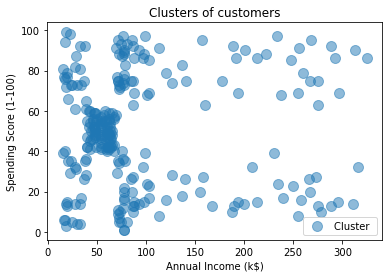

In [13]:
mtp.scatter(x[:,0], x[:,1], s = 100, label = 'Cluster ',alpha=0.5) 
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()

# Finding the optimal number of clusters using the Dendrogram

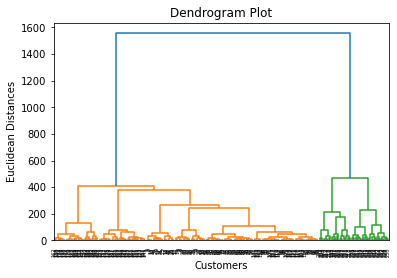

In [20]:
#Finding the optimal number of clusters using the dendrogram  
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()   

![](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning13.png)

In the above lines of code, we have imported the hierarchy module of scipy library. This module provides us a method shc.denrogram(), which takes the linkage() as a parameter. The linkage function is used to define the distance between two clusters, so here we have passed the x(matrix of features), and method "ward," the popular method of linkage in hierarchical clustering.

# Training the hierarchical clustering model

In [25]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  
y_pred

array([6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 3,
       6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

* n_clusters=7: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.
* affinity='euclidean': It is a metric used to compute the linkage.
* linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

# Visualizing the clusters

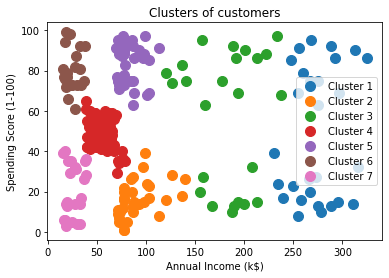

In [29]:
#visulaizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100,  label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100,  label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100,  label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100,  label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100,  label = 'Cluster 5') 
mtp.scatter(x[y_pred == 5, 0], x[y_pred == 5, 1], s = 100,  label = 'Cluster 6') 
mtp.scatter(x[y_pred == 6, 0], x[y_pred == 6, 1], s = 100,  label = 'Cluster 7') 

mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend(loc='center right', bbox_to_anchor=(1, 0.5))  
mtp.show()  

In [32]:
from sklearn.metrics import silhouette_score

In [31]:
# Calculate silhouette score
silhouette_avg = silhouette_score(x, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5124106133765781


# DBSCAN

What is Density-based clustering?
Density-Based Clustering refers to one of the most popular unsupervised learning methodologies used in model building and machine learning algorithms. The data points in the region separated by two clusters of low point density are considered as noise. The surroundings with a radius ε of a given object are known as the ε neighborhood of the object. If the ε neighborhood of the object comprises at least a minimum number, MinPts of objects, then it is called a core object.

![](https://static.javatpoint.com/tutorial/data-mining/images/density-based-clustering-in-data-mining.png)

![](https://static.javatpoint.com/tutorial/data-mining/images/density-based-clustering-in-data-mining2.png)

![](https://static.javatpoint.com/tutorial/data-mining/images/density-based-clustering-in-data-mining3.png)

## Major Features of Density-Based Clustering
The primary features of Density-based clustering are given below.

* It is a scan method.
* It requires density parameters as a termination condition.
* It is used to manage noise in data clusters.
* Density-based clustering is used to identify clusters of arbitrary size.

Density-Based Clustering Methods
DBSCAN

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It depends on a density-based notion of cluster. It also identifies clusters of arbitrary size in the spatial database with outliers

![](https://static.javatpoint.com/tutorial/data-mining/images/density-based-clustering-in-data-mining4.png)

# Here's what DBSCAN does:

## Density-Based:
* DBSCAN groups together closely packed points based on a specified distance measure (usually Euclidean distance).

## Core Points: 
* Points in the dataset that have a minimum number of neighboring points within a specified radius are called core points.

## Border Points: 
* Points that are within the specified radius of a core point but do not have enough neighbors to be core points themselves are called border points.

## Noise Points: 
* Points that are neither core nor border points are considered noise points.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
X.shape

(150, 4)

In [36]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
# Initialize DBSCAN with eps=0.5 (maximum distance between two samples to be considered as in the same neighborhood) and min_samples=5 (the minimum number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan

DBSCAN(eps=1, min_samples=6)

In [38]:
# Fit DBSCAN to the scaled data
dbscan.fit(X_scaled)

DBSCAN(eps=1, min_samples=6)

In [39]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

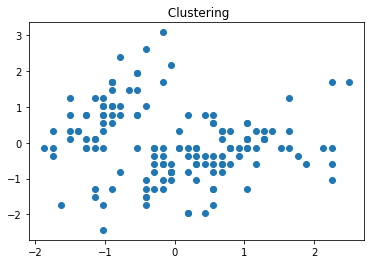

In [40]:
# Visualize the clusters
plt.scatter(X_scaled[:,0],X_scaled[:,1] )
plt.title(' Clustering')
plt.show()

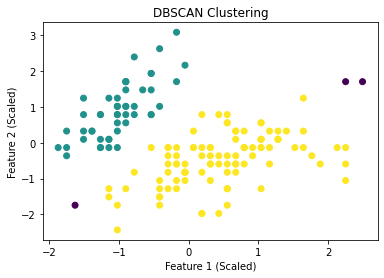

In [46]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

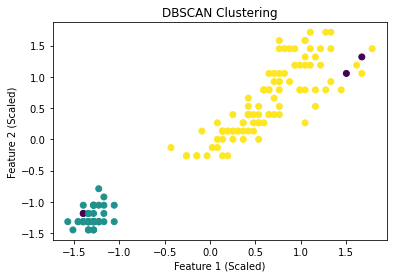

In [42]:
# Visualize the clusters
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=dbscan.labels_)
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()


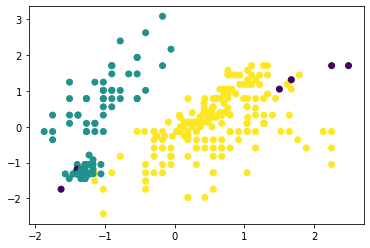

In [47]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=dbscan.labels_)
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

# Assuming clusters are computed using DBSCAN
# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5382884306788228


In [9]:
def info(*a):
    for i in a:
        print(i)

info(33,55,66,88)

33
55
66
88


# DIFFERENCES

K-means:

- Main: Divides data into K clusters by iteratively updating cluster centers to minimize distances between data points and cluster centers.
- Best Use: When the number of clusters is known and clusters are well-separated.

DBSCAN:

- Main: Forms clusters based on density of points, grouping closely packed points and identifying outliers as noise.
- Best Use: When clusters have varying shapes and densities, and when there are outliers or noise in the data.

Hierarchical Clustering:

- Main: Builds a hierarchy of clusters, either by merging similar clusters (agglomerative) or by splitting clusters (divisive).
- Best Use: When the hierarchical structure of the data is important, or when the number of clusters is not known beforehand.